In [1]:
# Check if autoreload is loaded and load/reload accordingly
try:
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt


# Bootstrapping the Gaussian
(Why you should play with made up data)

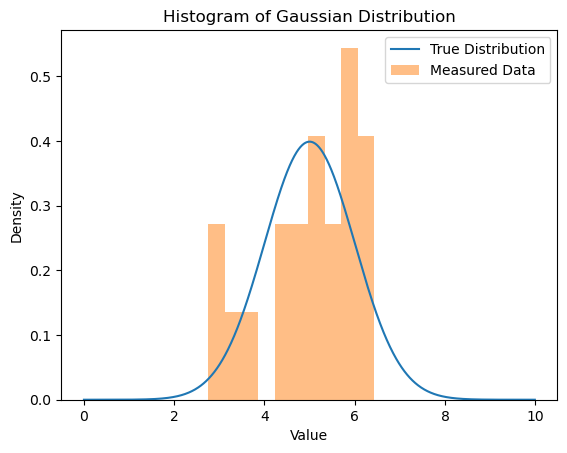

In [36]:
# Set random seed for reproducibility
np.random.seed(1234)
# Sample gaussian distribution
mu, sigma, N = 5, 1, 20  # mean and standard deviation
vals = np.arange(0,10,0.01)
x = np.random.normal(mu, sigma, N)
plt.plot(vals, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (vals - mu)**2 / (2 * sigma**2) ), label="True Distribution")
plt.hist(x, bins=10, density=True, alpha=0.5, label="Measured Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Gaussian Distribution")
plt.legend()
plt.show()


In [37]:
# Calculate sample mean and standard deviation
sample_mean = np.mean(x)
sample_std = np.std(x, ddof=1)  # Using ddof=1
print(f"Experiment Mean: {sample_mean}")
print(f"Experiment Standard Deviation: {sample_std}")
print(f"Standard Error of the Mean: {sample_std / np.sqrt(len(x))}")

Experiment Mean: 4.9887027560418975
Experiment Standard Deviation: 1.1018538565097906
Standard Error of the Mean: 0.2463820124426191


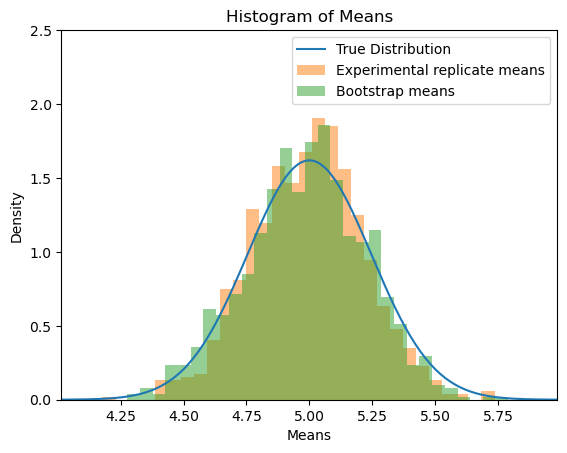

In [38]:
bootstrap_samples = 1000
bootstrap_data_sets = np.random.choice(x, size=(bootstrap_samples, N), replace=True)
bootstrap_means = np.mean(bootstrap_data_sets, axis=1)
x_resample = np.random.normal(mu, sigma, (bootstrap_samples, N))
x_resample_means = np.mean(x_resample, axis=1)
sem = sample_std / np.sqrt(N)
plt.plot(vals, 1/(sem * np.sqrt(2 * np.pi)) * np.exp( - (vals - mu)**2 / (2 * sem**2) ), label="True Distribution")
plt.hist(x_resample_means, bins=30, alpha=0.5, label="Experimental replicate means", density=True)
plt.hist(bootstrap_means, bins=30, alpha=0.5, label="Bootstrap means", density=True)
plt.ylim(0, 2.5)
plt.xlabel("Means")
plt.ylabel("Density")
plt.title("Histogram of Means")
plt.legend()
plt.xlim(mu - 4*sem, mu + 4*sem)
plt.show()

In [39]:
mean_of_bootstrap_means = np.mean(bootstrap_means)
std_of_bootstrap_means = np.std(bootstrap_means, ddof=1)
print(f"Mean of Bootstrap Sample Means: {mean_of_bootstrap_means}")
print(f"Standard Deviation of Bootstrap Sample Means: {std_of_bootstrap_means}")
print(f"Difference between Bootstrap Std and SEM: {np.abs(std_of_bootstrap_means - sem)}")

Mean of Bootstrap Sample Means: 4.98724715942517
Standard Deviation of Bootstrap Sample Means: 0.23851629562980947
Difference between Bootstrap Std and SEM: 0.00786571681280962


## Easy confidence intervals for the mean of a Gaussian

In [40]:
# Numerically compute 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
print(f"95% Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")
print(f"Theoretical 95% Confidence Interval for the Mean: ({sample_mean - 1.96*sem}, {sample_mean + 1.96*sem})")

95% Confidence Interval for the Mean: (4.499128276824623, 5.4426217983479415)
Theoretical 95% Confidence Interval for the Mean: (4.505794011654364, 5.471611500429431)


# Standard Error of Medians


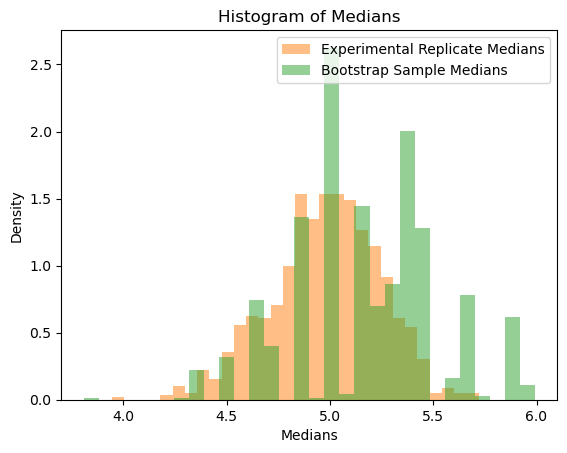

Mean of Bootstrap Sample Medians: 5.170303494475782
Standard Deviation of Bootstrap Sample Medians: 0.34202156622753677
Mean of Resample Medians: 4.978187782327754
Standard Deviation of Resample Medians: 0.26371206296249455
Difference between Bootstrap Median Std and Resample Median Std: 0.07830950326504221


In [41]:
bootstrap_medians = np.median(bootstrap_data_sets, axis=1)
resample_medians = np.median(np.random.normal(mu, sigma, (N, bootstrap_samples)), axis=0)
plt.hist(resample_medians, bins=30, alpha=0.5, label="Experimental Replicate Medians", color='C1',density=True)
plt.hist(bootstrap_medians, bins=30, alpha=0.5, label="Bootstrap Sample Medians", color='C2', density=True)
plt.xlabel("Medians")
plt.ylabel("Density")
plt.title("Histogram of Medians")
plt.legend()
plt.show()
print(f"Mean of Bootstrap Sample Medians: {np.mean(bootstrap_medians)}")
print(f"Standard Deviation of Bootstrap Sample Medians: {np.std(bootstrap_medians, ddof=1)}")
print(f"Mean of Resample Medians: {np.mean(resample_medians)}")
print(f"Standard Deviation of Resample Medians: {np.std(resample_medians, ddof=1)}")
print(f"Difference between Bootstrap Median Std and Resample Median Std: {np.abs(np.std(bootstrap_medians, ddof=1) - np.std(resample_medians, ddof=1))}")

# Propagation of error

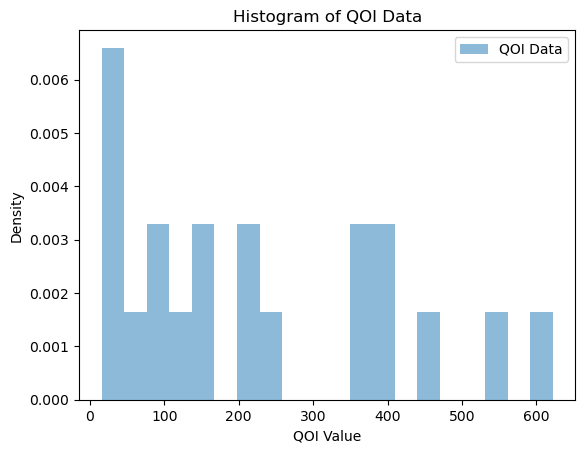

In [ ]:
qoi = np.exp(x)
plt.hist(qoi, bins=20, density=True, alpha=0.5, label="QOI Data")
plt.xlabel("QOI Value")
plt.ylabel("Density")
plt.title("Histogram of QOI Data")
plt.legend()
plt.show()

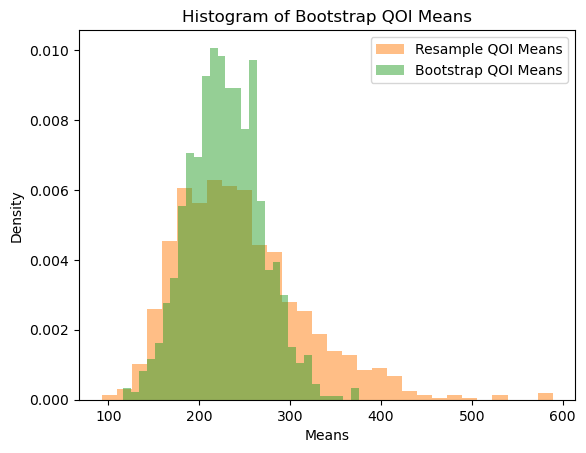

Mean of Bootstrap QOI Means: 229.21462381898988
Standard Deviation of Bootstrap QOI Means: 40.04573793495768
Mean of Resample QOI Means: 245.35456934241898
Standard Deviation of Resample QOI Means: 70.41472034292731
Theoretical Std of QOI Means from Propagation of Error: 90.20942063304804


In [86]:
qoi_datasets = np.exp(bootstrap_data_sets)
qoi_means = np.mean(qoi_datasets, axis=1)


resample_qoi_means = np.mean(np.exp(x_resample), axis=1)
plt.hist(resample_qoi_means, bins=30, alpha=0.5, label="Resample QOI Means", color='C1', density=True)
plt.hist(qoi_means, bins=30, alpha=0.5, label="Bootstrap QOI Means", color='C2', density=True)
plt.xlabel("Means")
plt.ylabel("Density")
plt.title("Histogram of Bootstrap QOI Means")
plt.legend()
plt.show()
print(f"Mean of Bootstrap QOI Means: {np.mean(qoi_means)}")
print(f"Standard Deviation of Bootstrap QOI Means: {np.std(qoi_means, ddof=1)}")
print(f"Mean of Resample QOI Means: {np.mean(resample_qoi_means)}")
print(f"Standard Deviation of Resample QOI Means: {np.std(resample_qoi_means, ddof=1)}")
print(f"Theoretical Std of QOI Means from Propagation of Error: {np.exp(mu) * (np.exp(sigma**2)/np.sqrt(N))}")

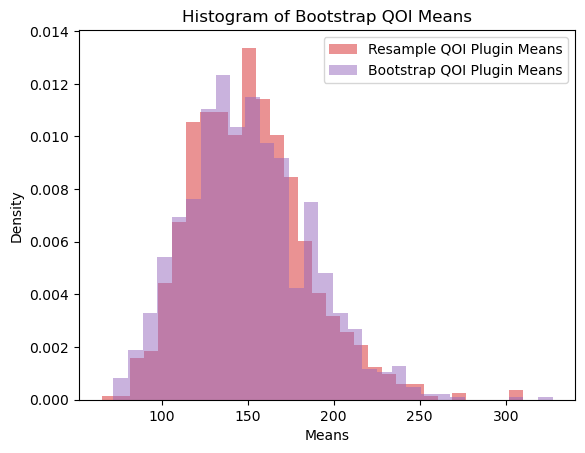

Mean of Bootstrap QOI Means: 229.21462381898988
Standard Deviation of Bootstrap QOI Means: 40.04573793495768
Mean of Resample QOI Plugin Means: 151.2815102375751
Standard Deviation of Resample QOI Plugin Means: 33.92084734243282
Theoretical Std Dev of QOI Plugin Means: 33.186191250885294


In [88]:
qoi_plugin_means = np.exp(bootstrap_means)
resample_qoi_plugin_means = np.exp(x_resample_means)
plt.hist(resample_qoi_plugin_means, bins=30, alpha=0.5, label="Resample QOI Plugin Means", color='C3', density=True)
plt.hist(qoi_plugin_means, bins=30, alpha=0.5, label="Bootstrap QOI Plugin Means", color='C4', density=True)
plt.xlabel("Means")
plt.ylabel("Density")
plt.title("Histogram of Bootstrap QOI Means")
plt.legend()
plt.show()

print(f"Mean of Bootstrap QOI Means: {np.mean(qoi_means)}")
print(f"Standard Deviation of Bootstrap QOI Means: {np.std(qoi_means, ddof=1)}")
print(f"Mean of Resample QOI Plugin Means: {np.mean(resample_qoi_plugin_means)}")
print(f"Standard Deviation of Resample QOI Plugin Means: {np.std(resample_qoi_plugin_means, ddof=1)}")
print(f"Theoretical Std Dev of QOI Plugin Means: {np.sqrt(sigma**2/N) * (np.exp(mu))}")